In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import random as rd
from scipy.spatial.distance import cdist 
import sys
%matplotlib inline

# 1) K-MEANS

## a) Program from scratch the clustering algorithm k-means with random initialization.

In [2]:
class k_means:

    def __init__(self, N_c):
        
        self.N_centroids = N_c
        
    def initialization_of_centroids_random(self):    
        sel = np.random.choice(self.N_points, size=self.N_centroids, replace=False)
        return self.data[ sel ]
    
    def initialization_of_centroids_plusplus(self):    
        i=rd.randint(0,self.N_points-1)
        centroids=np.array([self.data[i]])
        for k in range(1, self.N_centroids):
            D=np.array([]) 
            D=np.append(D,np.min(cdist(self.data, centroids,'sqeuclidean'), axis=1))
            prob=D/np.sum(D)
            cummulative_prob=np.cumsum(prob)
            r=rd.random()
            i=0
            for j,p in enumerate(cummulative_prob):
                if r<p:
                    i=j
                    break
            centroids=np.append(centroids,[self.data[i]],axis=0)
        return centroids
         
    
    def fit(self, data, init="random", N_max_iterations=1000):
        
        self.data=data
        self.N_points = np.shape(self.data)[0]
        
        if init=="k-means++":
            self.centroid_positions =  self.initialization_of_centroids_plusplus()
        else:    
            self.centroid_positions =  self.initialization_of_centroids_random()
            
        for cnt in range(N_max_iterations):
            dist2_mat = cdist(self.data, self.centroid_positions,'sqeuclidean')   
            dist2_min = np.array([np.min(dist2_mat, axis = 1) ]) 
            self.labels = np.argmin(dist2_mat, axis = 1)
            loss = dist2_min.sum() 
            skip=False
            for i in range(self.N_centroids):
                if len(self.data[self.labels  == i ]) == 0:
                    skip = True
            if skip == True :
                self.centroid_positions = self.initialization_of_centroids_random()
                continue
            new_centers = np.array([self.data[self.labels  == i].mean(axis=0) for i in range(self.N_centroids)])
            if np.all(self.centroid_positions == new_centers):
                break
            self.centroid_positions = new_centers
        if cnt == N_max_iterations-1: 
            print("Max iterations reached")
        return loss, cnt 

       
    def plot(self):    
        
        colors = plt.cm.get_cmap('rainbow')(np.linspace(0, 1, self.N_centroids))
        title_ = "label graph" 
        fig = plt.figure()
        label_set = set(self.labels)
        label_count = len(label_set)
        for cen in range(self.N_centroids):
            arr_points=self.data[self.labels  == cen]
            plt.scatter(arr_points[:,0],arr_points[:,1], color=colors[cen],s=4)
        plt.scatter(self.centroid_positions[:,0],self.centroid_positions[:,1], color="k")   
        title_text = 'instance count: %d, label count: %d' % (self.N_points, label_count)
        plt.title(title_text)
        plt.xlabel('x')
        plt.ylabel('y')
        
    def get_assignation(self):
        out = np.empty((self.N_points,3))
        for idx in range(self.N_points):
            out[idx,0]=self.data[idx][0]
            out[idx,1]=self.data[idx][1]
            out[idx,2]=self.labels[idx]
        return out      
    
    
    def F_ratio_index(self):
        SSW=0
        SSB = 0
        n_points_per_centroid=np.empty(self.N_centroids)
        xbar=self.data.mean(axis=0)
        for cen in range(self.N_centroids):
            centroid_points=self.data[self.labels  == cen]
            n_points_per_centroid[cen] = np.shape(centroid_points)[0]
            c = self.centroid_positions[cen].reshape((1,2))
            SSW += cdist(centroid_points, c, 'sqeuclidean').sum()
        
        for cen in range(self.N_centroids):
            a = self.centroid_positions[cen].reshape((1,2))
            b = xbar.reshape((1,2))
            SSB += n_points_per_centroid[cen] * cdist(a, b  ,'sqeuclidean').sum()
        return self.N_centroids * SSW/SSB    
     

## b) Download the data set S3 from http://cs.uef.fi/sipu/datasets/

20733633359318.242 22
CPU times: user 250 ms, sys: 15.7 ms, total: 266 ms
Wall time: 435 ms


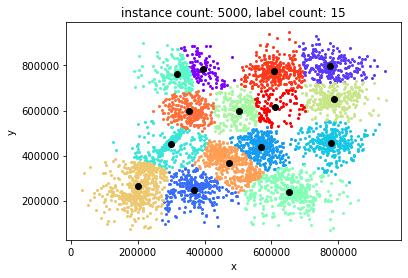

In [3]:
%%time
filename="data/s3.txt"
data_points = np.loadtxt(filename) 
myk = k_means(15)
loss,iteration=myk.fit(data_points) 
myk.plot()
print(loss,iteration)

## c) Apply the algorithm with k=15 100 times, obtain the best value of the objective function and the average one. Plot the assignation for the best case.

0 21401160566012.914 23
1 16890343461067.46 18
2 20599242352430.58 17
3 19122365076012.73 12
4 21045212410364.402 37
5 21382171689394.38 19
6 22999034280116.953 33
7 19200746800703.598 17
8 22853770758201.438 27
9 20687533562379.562 20
10 19237658832526.277 19
11 18663869643291.89 61
12 18825306576900.13 31
13 19241115832686.33 31
14 22821315629926.613 21
15 20633529617060.844 20
16 19202522875357.086 18
17 18744941587895.05 26
18 20949485012319.168 54
19 18693871423491.797 28
20 21071818747952.465 21
21 21076565516420.164 24
22 19083841381320.977 20
23 20903997154185.336 42
24 16890280150441.469 24
25 18827054988466.984 56
26 18834315095625.812 52
27 21205468543512.297 15
28 18888046563809.6 14
29 19043013628767.695 15
30 20696927645036.867 30
31 18693525647272.46 12
32 18834228210236.332 18
33 18670854666620.055 10
34 19214151728392.625 18
35 18693883746398.047 39
36 18662879683777.164 30
37 18960690610626.363 15
38 16889922402430.291 60
39 19010996055656.156 10
40 21019469314447.668

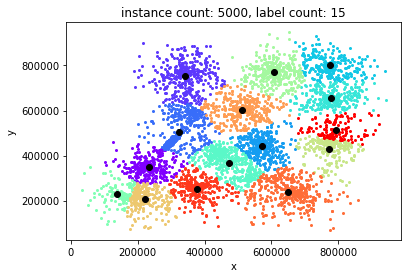

CPU times: user 7.5 s, sys: 261 ms, total: 7.77 s
Wall time: 10.2 s


In [4]:
%%time
filename="data/s3.txt"
data_points = np.loadtxt(filename) 
N_simulations=100
tmp_myk = k_means(15)
min_loss = np.inf
losses = np.empty(N_simulations)
i_tmp = 0
iterations = np.empty(N_simulations)
for i in range(N_simulations):
    loss,iteration=tmp_myk.fit(data=data_points, init="random") 
    if loss < min_loss:
        min_loss=loss
        i_min=i
        min_myk = tmp_myk
    print(i, loss, iteration)    
    losses[i]=loss
    iterations[i]=iteration
    
min_myk.plot()
print("mean = ",losses.mean())
print("i_min = ",i_min)
print("min = ",losses[i_min])    
print("avg convengece = ",iterations.mean())
plt.show()

Note:
    $$ \text{mean} \simeq 1.95 \times 10^{13} $$
    $$ \text{avg convengece in} \simeq  27  \text{ iterations}$$

## d) Implement K-means ++ initialization in your algorithm and redo point c)

0 19122065384445.65 16
1 18929493925376.586 22
2 19203661772850.492 22
3 19120265067480.746 19
4 16889803051008.586 30
5 18788847093098.574 23
6 16890487112543.734 24
7 18873849874867.344 21
8 18899455363320.383 40
9 16890297655310.484 37
10 18966658273491.434 13
11 19120223670200.805 42
12 21042600049235.777 22
13 20931696076436.97 13
14 18803136621147.5 18
15 19030437129358.418 15
16 18837582466223.668 37
17 18650919886799.266 15
18 21480964110951.17 36
19 18895562096770.047 19
20 21360778107936.953 30
21 16890340829305.252 24
22 18866362151031.71 23
23 19170762652542.07 14
24 16889643459853.945 14
25 20939784352186.68 50
26 16890400420594.033 35
27 16890234418747.105 15
28 20715216133271.477 24
29 19122000941206.105 25
30 16890046148871.06 13
31 20979552909921.234 17
32 18818286514705.766 12
33 21184501024744.023 21
34 16890066072235.412 14
35 18822940663506.6 34
36 21512436314804.727 14
37 16890042074935.66 13
38 16889976666025.613 11
39 18704403992978.68 34
40 18929123319684.594 2

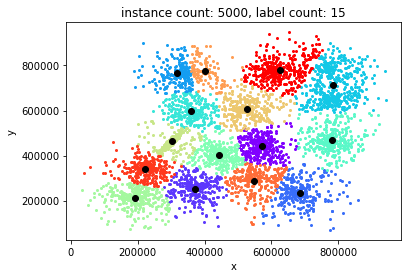

CPU times: user 6.97 s, sys: 185 ms, total: 7.15 s
Wall time: 8.02 s


In [5]:
%%time
filename="data/s3.txt"
data_points = np.loadtxt(filename) 
N_simulations=100
tmp_myk = k_means(15)
min_loss= np.inf
losses = np.empty(N_simulations)
i_tmp = 0
iterations = np.empty(N_simulations)
for i in range(N_simulations):
    loss,iteration=tmp_myk.fit(data=data_points, init="k-means++") 
    if loss<min_loss:
        min_loss=loss
        i_min=i
        min_myk = tmp_myk
    print(i,loss,iteration)        
    losses[i]=loss
    iterations[i]=iteration
    
min_myk.plot()
print("mean = ",losses.mean())
print("i_min = ",i_min)
print("min = ",losses[i_min])    
print("avg convengece = ",iterations.mean())
plt.show()

Note:
    $$ \text{mean} \simeq 1.89 \times 10^{13} $$
    $$ \text{avg convengece in} \simeq  23  \text{ iterations}$$

## e) Perform the scree plot (with k from 2 to 20) for this data set using the best value of the objective function.

2 210428334804957.56
3 139614749639647.7
4 91771622303874.1
5 75054113455106.05
6 61401878583665.945
7 50219935269293.875
8 42058481795944.84
9 36048589584476.06
10 30332846750788.695
11 27297307178673.375
12 24424386696092.227
13 21767573063664.555
14 19210855194120.21
15 16889571849356.738
16 16196902503539.441
17 15648003921598.027
18 15020534693832.889
19 14523027655683.395
20 14081746481383.035
CPU times: user 1min 27s, sys: 1.05 s, total: 1min 28s
Wall time: 1min 30s


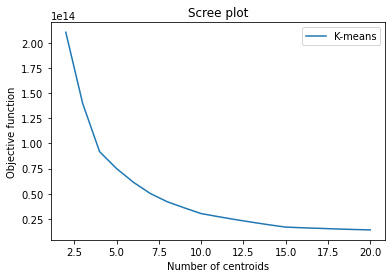

In [6]:
%%time
filename="data/s3.txt"
data_points = np.loadtxt(filename) 
N_simulations=100

res_k=list()

for n_c in range(2,21):
    tmp_myk = k_means(n_c)
    min_loss = sys.maxsize
    losses = np.empty(N_simulations)
    i_tmp = 0
    iterations = np.empty(N_simulations)
    for i in range(N_simulations):
        loss,iteration=tmp_myk.fit(data=data_points) 
        if loss<min_loss:
            min_loss=loss
            i_min=i
            min_myk = tmp_myk  
        losses[i]=loss
        iterations[i]=iteration
    print(n_c,losses[i_min])    
    res_k.append([n_c,losses[i_min]])

res_k=np.array(res_k)
plt.plot(res_k[:,0], res_k[:,1], label="K-means")
plt.title("Scree plot")
plt.ylabel('Objective function')
plt.xlabel('Number of centroids')
plt.legend()

# 2. FUZZY C-MEANS

## a) Modify k-means for obtaining c-means.

We use this relation:

$$ u_{ij}=\frac{1}{\sum_{k=1}^C\left( \frac{|| x_i-c_j||}{||x_i-c_k||}\right)^{\frac{2}{m-1}} }$$

$$ u_{ij}=\frac{1}{\sum_{k=1}^C\left( \frac{\sqrt{ (x_i-c_j)^2 }}{\sqrt{(x_i-c_k)^2}}\right)^{\frac{2}{m-1}} }$$

$$ u_{ij}=\frac{1}{\sum_{k=1}^C\left( \frac{ (x_i-c_j)^2 }{(x_i-c_k)^2}\right)^{\frac{1}{m-1}} }$$


$$ u_{ij}= \frac{   \sum_{k=1}^C \left((x_i-c_k)^2\right)^{\frac{1}{m-1}}   }{ \left((x_i-c_j)^2 \right)^{\frac{1}{m-1}}} $$


$$ u_{ij}= \frac{   \sum_{k=1}^C \left(d^2_{ik}\right)^{\frac{1}{m-1}}   }{ \left(d^2_{ij} \right)^{\frac{1}{m-1}}} $$

$$ u_{ij}= \frac{  \tilde{u}_{ij}  }{  \sum_{k=1}^C \tilde{u}_{ik}  } $$

where

$$ \tilde{u}_{ij}  = \frac{1}{\left(d^2_{ij}\right)^{\frac{1}{m-1}} } $$

In [7]:
class fuzzy_c_means:

    def __init__(self, N_c, m=2):
        self.N_centroids = N_c
        self.m = m
        self.centroid_positions =np.empty((self.N_centroids,2))

    def fit(self,data, N_max_iterations=500, tol=1e-3):
        self.data = data
        self.N_points = np.shape(self.data)[0]
        self.u = np.empty((self.N_centroids,self.N_points))
        # Randomly initialize centers
        self.centroid_positions = self.data[np.random.choice(self.N_points, size=self.N_centroids, replace=False)]
    
        dist = np.fmax(
            cdist(self.centroid_positions, self.data, metric='sqeuclidean'), np.finfo(np.float64).eps)
        prev_u = np.ones((self.N_centroids,self.N_points))
        for iteration in range(N_max_iterations):     
            utilde = (1 / dist) ** (1 / (self.m-1))
            self.u  = (utilde / utilde.sum(axis=0))
            um=self.u **self.m
            denominator = np.reshape(um.sum(axis=1),(self.N_centroids,1))
            self.centroid_positions = um.dot(self.data)/denominator
            dist = cdist(self.centroid_positions, self.data, metric='sqeuclidean')
            dist2_min = np.array([np.min(dist,axis=0) ]) 
            self.labels = np.argmin(dist,axis=0)
            loss=dist2_min.sum() 
            if np.linalg.norm(prev_u-self.u )<tol: 
                break
            prev_u=self.u 
            
        return loss, iteration
    
    def plot(self):    
        
        colors = plt.cm.get_cmap('rainbow')(np.linspace(0, 1, self.N_centroids))
        title_ = "label graph" 
        fig = plt.figure()
        label_set = set(self.labels)
        label_count = len(label_set)
        for cen in range(self.N_centroids):
            arr_points=self.data[self.labels  == cen]
            plt.scatter(arr_points[:,0],arr_points[:,1], color=colors[cen],s=4)
        plt.scatter(self.centroid_positions[:,0],self.centroid_positions[:,1], color="k")   
        title_text = 'instance count: %d, label count: %d' % (self.N_points, label_count)
        plt.title(title_text)
        plt.xlabel('x')
        plt.ylabel('y')



## b) Perform the scree plot for the same data set.

2 213560764480162.03
3 146155207180643.62
4 93722537046697.05
5 78198839165753.86
6 63888893877196.95
7 52167562604650.5
8 44796792112744.03
9 37849973232498.21
10 31328231250823.508
11 28053818666390.57
12 24964194291180.67
13 22374396229220.03
14 19591217891088.406
15 16941894722111.168
16 16316225213351.893
17 15797272144537.512
18 15322403275870.34
19 14875553213009.178
20 14463334719472.145
CPU times: user 8min 54s, sys: 12.9 s, total: 9min 7s
Wall time: 4min 52s


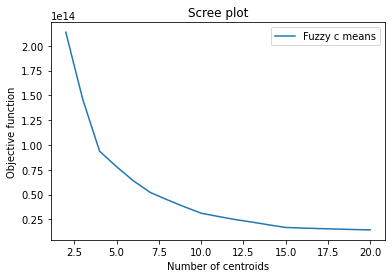

In [8]:
%%time
filename="data/s3.txt"
data_points = np.loadtxt(filename) 
N_simulations=100

res_fuzzy=list()

for n_c in range(2,21):
    tmp_myfuz = fuzzy_c_means(n_c)
    min_loss= np.inf
    losses = np.empty(N_simulations)
    i_tmp = 0
    iterations = np.empty(N_simulations)
    for i in range(N_simulations):
        loss,iteration =tmp_myfuz.fit(data=data_points) 
        if loss<min_loss:
            min_loss = loss
            i_min=i
            min_myfuz = tmp_myfuz  
        losses[i]=loss
        iterations[i]=iteration
    print(n_c,losses[i_min])    
    res_fuzzy.append([n_c,losses[i_min]])

res_fuzzy=np.array(res_fuzzy)
plt.plot(res_fuzzy[:,0], res_fuzzy[:,1], label="Fuzzy c means")
plt.title("Scree plot")
plt.ylabel('Objective function')
plt.xlabel('Number of centroids')
plt.legend()

## Scree plot comparison 

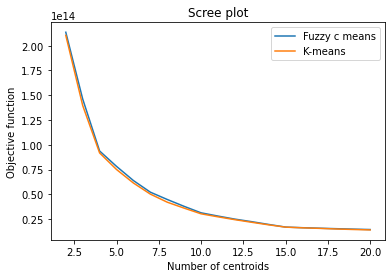

In [9]:
plt.plot(res_fuzzy[:,0], res_fuzzy[:,1], label="Fuzzy c means")
plt.plot(res_k[:,0], res_k[:,1], label="K-means")

plt.title("Scree plot")
plt.ylabel('Objective function')
plt.xlabel('Number of centroids')
#plt.yscale("log")
plt.legend()

## c) Plot the assignation for the best case.

0 16941911749078.535 32
1 19785670221611.71 147
2 19785671569774.723 149
3 19745139742257.836 54
4 19352453544844.742 149
5 19445367149463.164 88
6 16941900106209.703 32
7 19785031256506.62 141
8 19542131183877.25 79
9 16941894341635.188 36
10 19716290892328.75 235
11 19324022946367.26 87
12 16941913154257.723 25
13 19094276895873.094 198
14 16941905276975.342 30
15 19220282418895.44 37
16 16941910489500.293 62
17 16941901205201.37 37
18 19641049485857.56 122
19 19641051563186.844 138
20 21493338655587.312 499
21 16941908879939.297 46
22 19088986148961.023 29
23 21343283856868.777 246
24 19641063236625.305 101
25 16941898850457.26 31
26 19773620269786.805 147
27 19339580915632.555 73
28 21297615228443.305 67
29 19897250691196.203 165
30 23573313837935.395 130
31 19785670965432.414 152
32 19662371225390.56 92
33 16941903522943.281 42
34 19094279051482.973 70
35 19745127031250.703 46
36 19339517872767.258 68
37 19339575021719.02 52
38 16941898237231.918 44
39 16941910637983.566 28
40 224

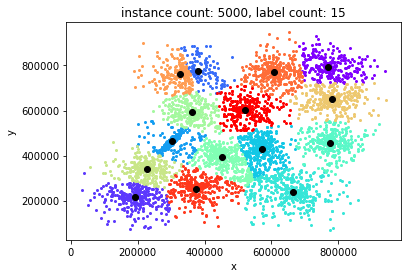

CPU times: user 35.4 s, sys: 1.18 s, total: 36.6 s
Wall time: 22.9 s


In [10]:
%%time
filename="data/s3.txt"
data_points = np.loadtxt(filename) 
N_simulations=100
tmp_myfuz = fuzzy_c_means(15)
min_loss=np.inf
losses = np.empty(N_simulations)
i_tmp = 0
iterations = np.empty(N_simulations)
for i in range(N_simulations):
    loss,iteration=tmp_myfuz.fit(data_points) 
    if loss<min_loss:
        min_loss=loss
        i_min=i
        min_myfuz = tmp_myfuz
    print(i,loss,iteration)
    losses[i]=loss
    iterations[i]=iteration
    
min_myfuz.plot()
print("mean = ",losses.mean())
print("i_min = ",i_min)
print("min = ",losses[i_min])    
print("avg convengece = ",iterations.mean())
plt.show()

## (Optional) modify your k-means code for obtaining k-medoids.

In [11]:
class k_medoids():
   
    def __init__(self, N_m=8):

        self.N_medoids = N_m
        
    def initialization_of_medoids_random(self):    
        sel = np.random.choice(self.N_points, size=self.N_medoids, replace=False)
        return sel
 
    def fit(self, data, N_max_iterations=1000):
        
        self.data=data
        self.N_points = np.shape(self.data)[0] 
        medoid_idxs = self.initialization_of_medoids_random()
        
        D_matrix = cdist(self.data, self.data,'sqeuclidean')

        for cnt in range(N_max_iterations):
            old_medoid_idxs = np.copy(medoid_idxs)
            labels = np.argmin(D_matrix[medoid_idxs, :], axis=0)
            self.update_medoids(D_matrix, labels, medoid_idxs)
            if np.all(old_medoid_idxs == medoid_idxs):
                break
                
        self.centroid_positions = self.data[medoid_idxs]
        self.labels = np.argmin(D_matrix[medoid_idxs, :], axis=0)
        dist2_mat = cdist(self.data, self.centroid_positions,'sqeuclidean')   
        dist2_min = np.array([np.min(dist2_mat, axis = 1) ]) 
        loss = np.sum(dist2_min)
        
        return loss, cnt

    def update_medoids(self, D, labels, medoid_indexes):

        for k in range(self.N_medoids):
            cluster_k_indexes = np.where(labels == k)[0]
            if len(cluster_k_indexes) == 0:
                continue
            intra_cluster_distances = D[cluster_k_indexes, cluster_k_indexes[:, np.newaxis]]
            intra_cluster_all_costs = np.sum(intra_cluster_distances, axis=1)
            min_cost_index = np.argmin(intra_cluster_all_costs)
            min_cost = intra_cluster_all_costs[min_cost_index]
            curr_cost = intra_cluster_all_costs[np.argmax(cluster_k_indexes == medoid_indexes[k])]
            if min_cost < curr_cost:
                medoid_indexes[k] = cluster_k_indexes[min_cost_index]

    def plot(self):    
        colors = plt.cm.get_cmap('rainbow')(np.linspace(0, 1, self.N_medoids))
        title_ = "label graph" 
        fig = plt.figure()
        label_set = set(self.labels)
        label_count = len(label_set)
        for cen in range(self.N_medoids):
            arr_points=self.data[self.labels  == cen]
            plt.scatter(arr_points[:,0],arr_points[:,1], color=colors[cen],s=4)
        plt.scatter(self.centroid_positions[:,0],self.centroid_positions[:,1], color="k")   
        title_text = 'instance count: %d, label count: %d' % (self.N_points, label_count)
        plt.title(title_text)
        plt.xlabel('x')
        plt.ylabel('y')  

    def get_assignation(self):
        out = np.empty((self.N_points,3))
        for idx in range(self.N_points):
            out[idx,0]=self.data[idx][0]
            out[idx,1]=self.data[idx][1]
            out[idx,2]=self.labels[idx]
        return out      
    
    
    def F_ratio_index(self):
        SSW=0
        SSB = 0
        n_points_per_centroid=np.empty(self.N_medoids)
        xbar=self.data.mean(axis=0)
        for cen in range(self.N_medoids):
            centroid_points=self.data[self.labels  == cen]
            n_points_per_centroid[cen] = np.shape(centroid_points)[0]
            c = self.centroid_positions[cen].reshape((1,2))
            SSW += cdist(centroid_points, c, 'sqeuclidean').sum()
        
        for cen in range(self.N_medoids):
            a = self.centroid_positions[cen].reshape((1,2))
            b = xbar.reshape((1,2))
            SSB += n_points_per_centroid[cen] * cdist(a, b  ,'sqeuclidean').sum()
        return self.N_medoids * SSW/SSB    
      

0 21178478729152.0 11
1 18954389071007.0 14
2 25173625836478.0 13
3 21007347524970.0 14
4 21253007556105.0 10
5 19239308405938.0 10
6 26646363803570.0 8
7 20963698679921.0 12
8 18919731282846.0 8
9 16902217732644.0 15
10 21243726418680.0 18
11 21243836485489.0 13
12 18849605921779.0 9
13 19330392934524.0 21
14 16901519010177.0 15
15 20885018948400.0 16
16 18678736664373.0 12
17 18897067654300.0 15
18 19003055454046.0 9
19 21295874811996.0 13
20 19225171766111.0 14
21 21201365265505.0 8
22 21061330998671.0 11
23 21109941104052.0 17
24 18788094658357.0 11
25 16918987693227.0 11
26 20968847902333.0 9
27 21884153118175.0 14
28 27125853474985.0 10
29 18975373578107.0 10
30 19905253188160.0 9
31 18710493769161.0 10
32 19256455467450.0 12
33 25271006892943.0 10
34 19302112970929.0 8
35 19262110217580.0 12
36 18918692026748.0 13
37 21003043447982.0 20
38 19102697369953.0 18
39 19239188511284.0 10
40 20986423639816.0 9
41 16902628028072.0 9
42 21396793069624.0 14
43 21172857906445.0 14
44 19211

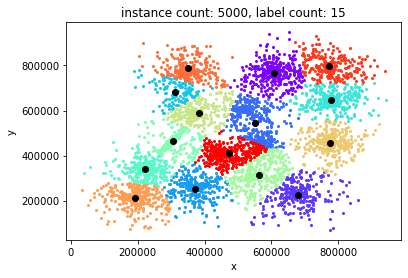

CPU times: user 40.7 s, sys: 8.44 s, total: 49.2 s
Wall time: 53.4 s


In [12]:
%%time
filename="data/s3.txt"
data_points = np.loadtxt(filename) 
N_simulations=100
tmp_mymed = k_medoids(15)
min_loss= np.inf
losses = np.empty(N_simulations)
i_tmp = 0
iterations = np.empty(N_simulations)
for i in range(N_simulations):
    loss,iteration=tmp_mymed.fit(data=data_points) 
    if loss < min_loss:
        min_loss = loss
        i_min=i
        min_mymed = tmp_mymed
    print(i,loss,iteration)        
    losses[i]=loss
    iterations[i]=iteration
    
min_mymed.plot()
print("mean = ",losses.mean())
print("i_min = ",i_min)
print("min = ",losses[i_min])    
print("avg convengece = ",iterations.mean())
plt.show()

In [13]:
print(min_mymed.F_ratio_index())

0.7947693930322024
